In [10]:
#Read wide table from one drive
widecsv=read.csv("ED Fig.5b.csv", sep=",")
## change the name also in export file
#rotate from wide table to tall table
tallcsv <- stack(widecsv)

#change column name
names(tallcsv)[1] <- ("VALUE")
names(tallcsv)[2] <- ("Treatment")

#add new column for Trial
tallcsv$Trial <- "One"

#change different trial using each n of each trial
## Trial "One" max n: 6 // Trial "Two" max n: 6
### you can modify this "for loop" using rest of dividing 
for(i in 1:nrow(tallcsv))
  if(i%%11< 6 & i%%11 > 0){
    tallcsv[i,3] <- "One"
  } 
for(i in 1:nrow(tallcsv))
  if(i%%11 >= 7 | i%%11 == 0){
    tallcsv[i,3] <- "Two"
  } 
print(tallcsv)

#delete NA row
tallcsv2 <- tallcsv[!is.na(tallcsv$VALUE),]
#change column location
tallcsv3 <- data.frame(tallcsv2[2],tallcsv2[1],tallcsv2[3])

#export
write.csv(tallcsv3,"ED Fig.5b_tall.csv", row.names = FALSE)



         VALUE        Treatment Trial
1    12515.666         X01.DMSO   One
2     6077.272         X01.DMSO   One
3     3758.324         X01.DMSO   One
4     1770.242         X01.DMSO   One
5           NA         X01.DMSO   One
6           NA         X01.DMSO   One
7    26531.472         X01.DMSO   Two
8    22428.104         X01.DMSO   Two
9    47170.909         X01.DMSO   Two
10    2073.524         X01.DMSO   Two
11          NA         X01.DMSO   Two
12   25737.268   X02.flg20.1.nM   One
13    7455.971   X02.flg20.1.nM   One
14    9364.046   X02.flg20.1.nM   One
15    1086.429   X02.flg20.1.nM   One
16          NA   X02.flg20.1.nM   One
17          NA   X02.flg20.1.nM   One
18    3474.250   X02.flg20.1.nM   Two
19   68620.228   X02.flg20.1.nM   Two
20   11611.218   X02.flg20.1.nM   Two
21   29128.616   X02.flg20.1.nM   Two
22          NA   X02.flg20.1.nM   Two
23    6890.755 X03.Maya2.100.nM   One
24   10505.490 X03.Maya2.100.nM   One
25    6060.778 X03.Maya2.100.nM   One
26    9653.5

In [11]:
#load the required packages
library(car)
library(MASS)
library(stats)
library(sjPlot)
library(tidyverse)
library(lme4)
library(lmerTest)
library(LMERConvenienceFunctions)
library(multcomp)

In [12]:
#VALUEdata=read.csv(choose.files())
VALUEdata=read.csv("ED Fig.5b_tall.csv", sep=",")
VALUEdata$VALUE <- as.numeric(as.character(VALUEdata$VALUE))

print(head(VALUEdata))

  Treatment     VALUE Trial
1  X01.DMSO 12515.666   One
2  X01.DMSO  6077.272   One
3  X01.DMSO  3758.324   One
4  X01.DMSO  1770.242   One
5  X01.DMSO 26531.472   Two
6  X01.DMSO 22428.104   Two


[1] 46 45

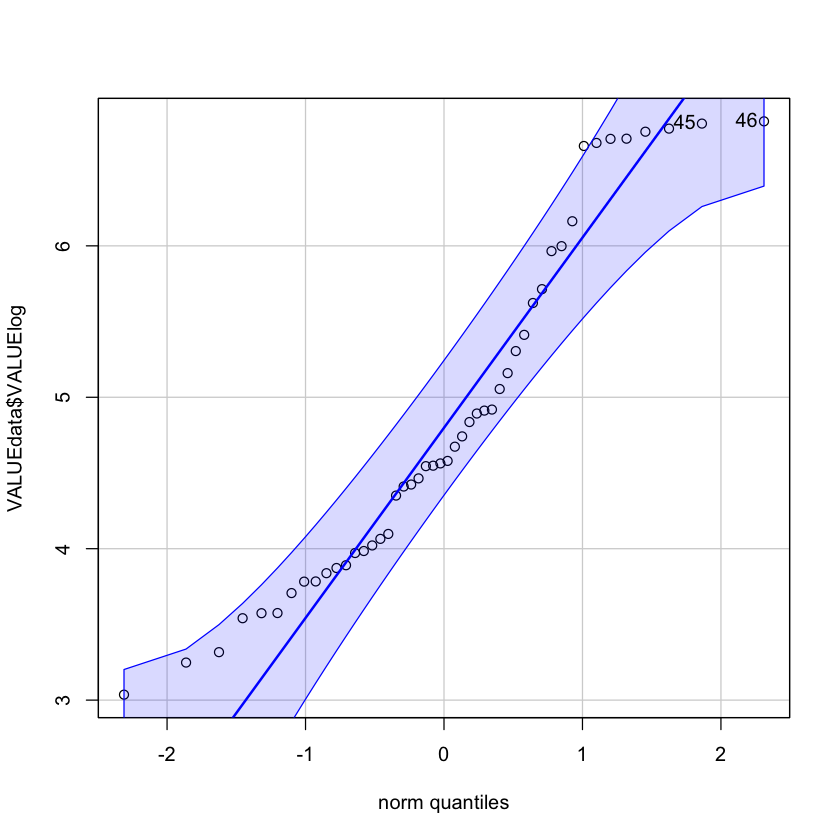

In [13]:
#Normal distribution and log converted
VALUEdata$VALUElog <- log10(VALUEdata$VALUE)
qqp(VALUEdata$VALUElog, "norm")

Warning message:
“Model was not fitted by REML. Re-fitting model using REML, but p-values, df, etc. still might be unreliable.”


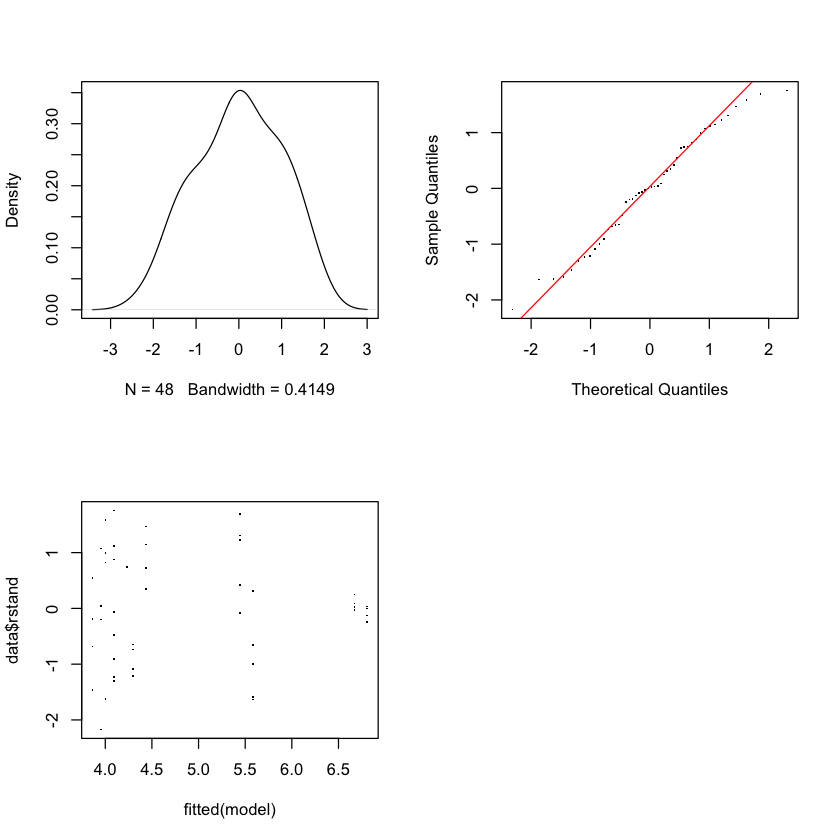

In [14]:
#set REML to FALSE if the data is normal, so we can use the maximum likelihood because the data are normal, we have similar sample sizes between effects, and we only have one random effect
VALUElog.lmm<-lmer(VALUElog ~ Treatment + (1|Trial), data = VALUEdata, REML = FALSE)
m<-lmer(VALUElog ~ Treatment + (1|Trial), data = VALUEdata, REML = FALSE)
tab_model(m, p.val = "kr", show.df = TRUE)
#the density plot should look roughly normal, centered on 0. In the quantile plot the black dots should roughly mirror the red line. And in the fitted residual plot most black dots should be between the red lines, with no obvious skew from left to right.
mcp.fnc(VALUElog.lmm)

In [16]:
#If the above looks good, then we can get the model characteristics
summary(VALUElog.lmm)

Linear mixed model fit by maximum likelihood . t-tests use Satterthwaite's
  method [lmerModLmerTest]
Formula: VALUElog ~ Treatment + (1 | Trial)
   Data: VALUEdata

     AIC      BIC   logLik deviance df.resid 
    71.3     86.2    -27.6     55.3       40 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.1723 -0.6974  0.0110  0.7696  1.7548 

Random effects:
 Groups   Name        Variance Std.Dev.
 Trial    (Intercept) 0.008776 0.09368 
 Residual             0.179277 0.42341 
Number of obs: 48, groups:  Trial, 2

Fixed effects:
                          Estimate Std. Error       df t value Pr(>|t|)    
(Intercept)                3.93364    0.16370 17.54313  24.030 7.17e-15 ***
TreatmentX02.flg20.1.nM    0.09099    0.21171 45.97493   0.430   0.6694    
TreatmentX03.Maya2.100.nM  0.43156    0.21171 45.97493   2.039   0.0473 *  
TreatmentX04.Maya2.1.uM    0.22733    0.22916 46.30565   0.992   0.3263    
TreatmentX05.Maya2.10.uM   1.58073    0.20084 45.97493   7.871 4.61e-1

In [17]:
#anova analysis of lmm
aov <- anova(m)
print(summary(aov))
#Tukey's post-hoc, load library multcomp
tukey_result <- glht(m, linfct = mcp(Treatment = "Tukey"))
multcomps <- cld(tukey_result)
print(multcomps)
print(summary(tukey_result))

     Sum Sq         Mean Sq          NumDF       DenDF          F value     
 Min.   :49.83   Min.   :9.966   Min.   :5   Min.   :46.07   Min.   :55.59  
 1st Qu.:49.83   1st Qu.:9.966   1st Qu.:5   1st Qu.:46.07   1st Qu.:55.59  
 Median :49.83   Median :9.966   Median :5   Median :46.07   Median :55.59  
 Mean   :49.83   Mean   :9.966   Mean   :5   Mean   :46.07   Mean   :55.59  
 3rd Qu.:49.83   3rd Qu.:9.966   3rd Qu.:5   3rd Qu.:46.07   3rd Qu.:55.59  
 Max.   :49.83   Max.   :9.966   Max.   :5   Max.   :46.07   Max.   :55.59  
     Pr(>F)         
 Min.   :2.205e-18  
 1st Qu.:2.205e-18  
 Median :2.205e-18  
 Mean   :2.205e-18  
 3rd Qu.:2.205e-18  
 Max.   :2.205e-18  
        X01.DMSO   X02.flg20.1.nM X03.Maya2.100.nM   X04.Maya2.1.uM 
             "a"              "a"              "a"              "a" 
 X05.Maya2.10.uM   X06.flg22.1.nM 
             "b"              "c" 

	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Tukey Contrasts


Fit: